Image Dimension = (80, 180, 4)


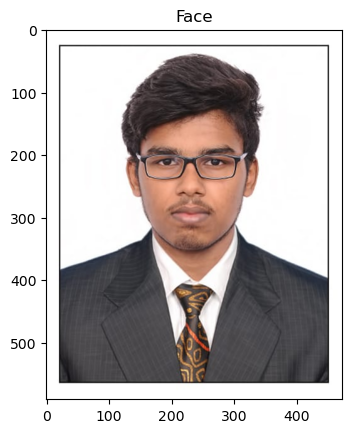

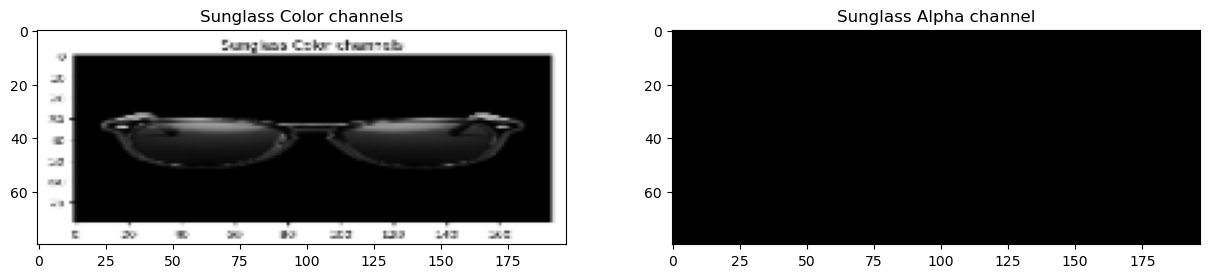

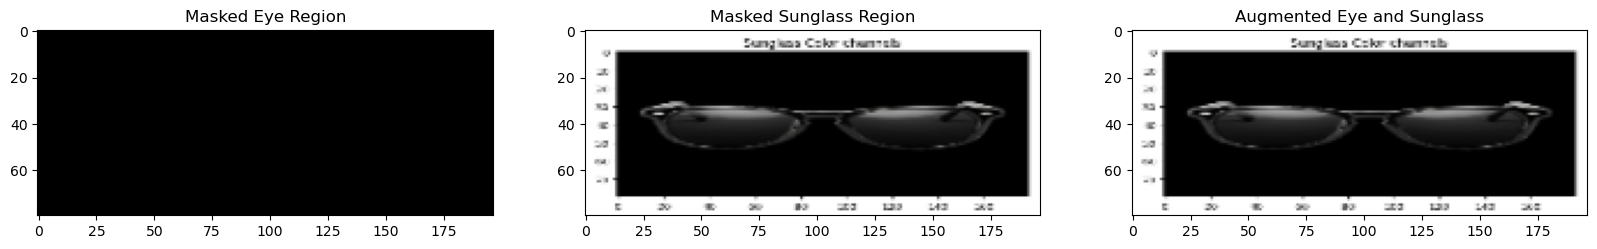

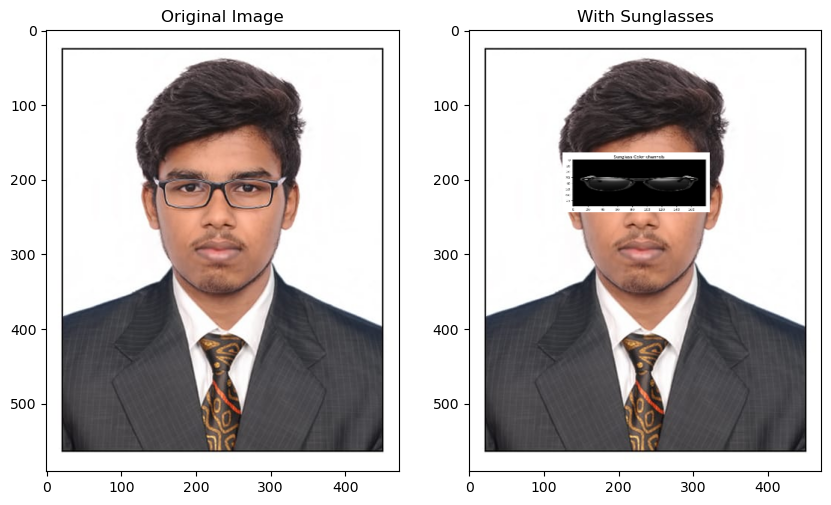

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the face image
img = cv2.imread('me.jpeg')
plt.imshow(img[:,:,::-1]); plt.title("Face")

# Load the sunglass image
glassPNG = cv2.imread('sunglass.png', -1)

# Resize the sunglass image to fit on the face
glassPNG = cv2.resize(glassPNG, (180, 80))
print("Image Dimension =", glassPNG.shape)

# Check if alpha channel exists, if not add one
if glassPNG.shape[-1] == 3:
    glassPNG = cv2.cvtColor(glassPNG, cv2.COLOR_BGR2BGRA)

# Split into color and alpha channels
glassBGR = glassPNG[:, :, :3]
glassMask1 = glassPNG[:, :, 3]

# Resize glassMask to match eyeROI size
eyeROI = img[165:245, 125:322]  # Adjusted ROI
glassMask1 = cv2.resize(glassMask1, (eyeROI.shape[1], eyeROI.shape[0]))
glassBGR = cv2.resize(glassBGR, (eyeROI.shape[1], eyeROI.shape[0]))

# Display sunglass color channels and alpha channel
plt.figure(figsize=[15, 15])
plt.subplot(121); plt.imshow(glassBGR[:,:,::-1]); plt.title('Sunglass Color channels')
plt.subplot(122); plt.imshow(glassMask1, cmap='gray'); plt.title('Sunglass Alpha channel')

# Create mask for blending
glassMask = cv2.merge((glassMask1, glassMask1, glassMask1))
glassMask = glassMask.astype(np.float32) / 255  # Convert to float for blending

# Masked eye region
faceWithGlassesArithmetic = img.copy()
eyeROI = faceWithGlassesArithmetic[165:245, 125:322] 

# Ensure data types match
eyeROI = eyeROI.astype(np.float32) / 255
glassBGR = glassBGR.astype(np.float32) / 255

# Apply blending
maskedEye = cv2.multiply(eyeROI, (1 - glassMask))
maskedGlass = cv2.multiply(glassBGR, glassMask)
eyeRoiFinal = cv2.add(maskedEye, maskedGlass)

# Convert back to uint8
eyeRoiFinal = (eyeRoiFinal * 255).astype(np.uint8)

# Display masked and blended regions
plt.figure(figsize=[20, 20])
plt.subplot(131); plt.imshow(maskedEye[...,::-1]); plt.title("Masked Eye Region")
plt.subplot(132); plt.imshow(maskedGlass[...,::-1]); plt.title("Masked Sunglass Region")
plt.subplot(133); plt.imshow(eyeRoiFinal[...,::-1]); plt.title("Augmented Eye and Sunglass")

# Final result with blending
faceWithGlassesArithmetic[165:245, 125:322] = eyeRoiFinal 
plt.figure(figsize=[10, 10])
plt.subplot(121); plt.imshow(img[:,:,::-1]); plt.title("Original Image")
plt.subplot(122); plt.imshow(faceWithGlassesArithmetic[:,:,::-1]); plt.title("With Sunglasses")

plt.show()

